# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


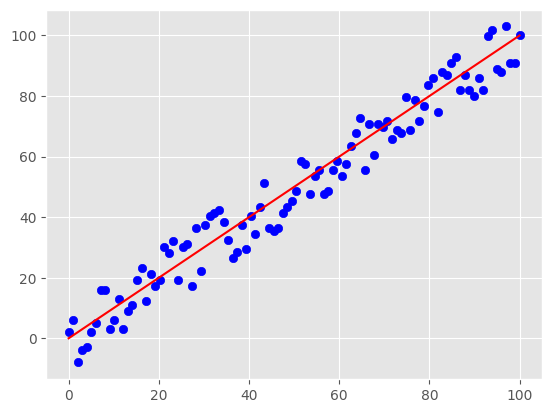

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

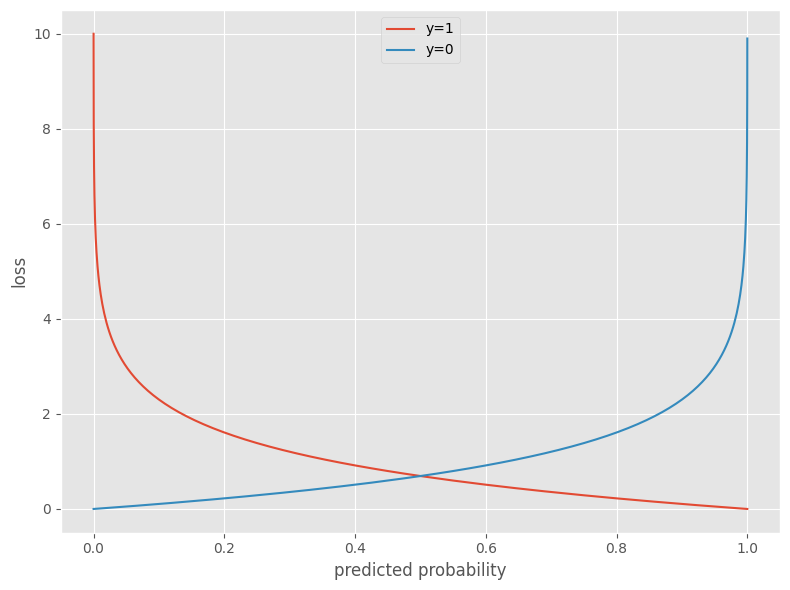

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

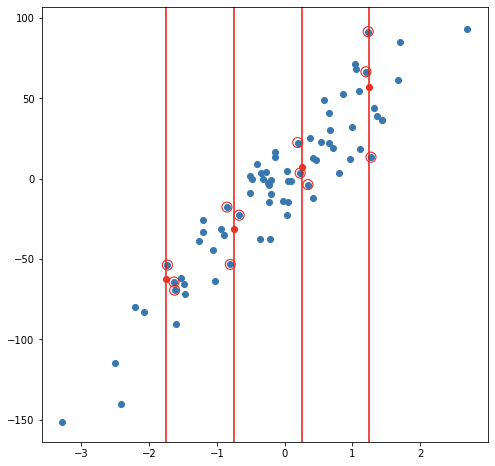

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

/tmp/ipython-input-319556835.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-319556835.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

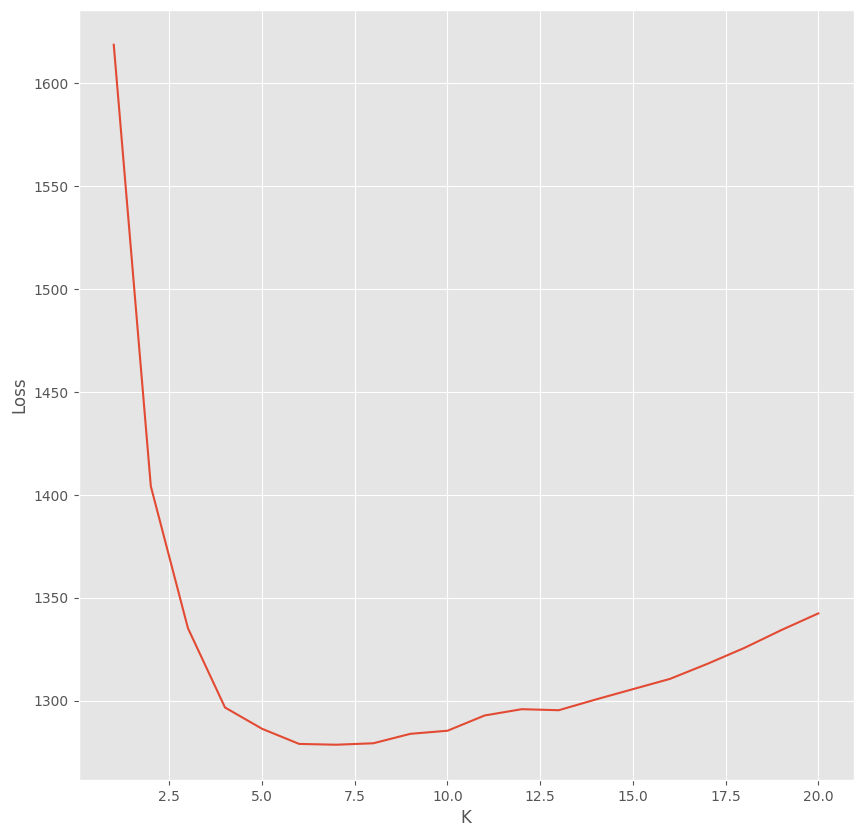

Minimum error 1278.5816281094171 is at k = 6


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

**Ans:**

  Effect of Different Loss Functions in Regression:

  In regression tasks, loss functions measure the difference between actual values and predicted values.

  Mean Absolute Error (MAE):
  MAE calculates the average of absolute errors. It treats all errors equally and is less sensitive to outliers.

  Mean Squared Error (MSE):
  MSE squares the errors, giving higher penalty to large errors. It is sensitive to outliers and emphasizes large deviations.

  Root Mean Squared Error (RMSE):
  RMSE is the square root of MSE and is expressed in the same units as the target variable, making interpretation easier.

  RMSE is greater than MAE because squaring the errors increases the impact of large prediction errors. This indicates the presence of some larger deviations in predictions.

  2. Cross-Entropy Loss Observation

  Cross-entropy loss is used in classification tasks, not regression. It heavily penalizes confident but incorrect predictions. The plotted graph shows that loss increases sharply when predicted probability is far from the actual class.

  3. KNN Regression and Effect of K

  KNN regression performance depends heavily on the value of K.

  K = 1:The model overfits as it relies on the nearest neighbor and is sensitive to noise.

  Small K:Low bias and high variance.

  Optimal K:Achieves a balance between bias and variance, giving minimum RMSE.

  Large K (close to dataset size):High bias and low variance, causing underfitting.

  Observation from the RMSE vs K plot:The minimum RMSE occurs at an intermediate value of K, indicating the best model performance.


2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

#Huber Loss:

Huber Loss is a regression loss function that combines the best properties of Mean Squared Error (MSE) and Mean Absolute Error (MAE).

It is quadratic for small errors and linear for large errors, which makes it robust to outliers while still being smooth and stable to optimize.

In [3]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))



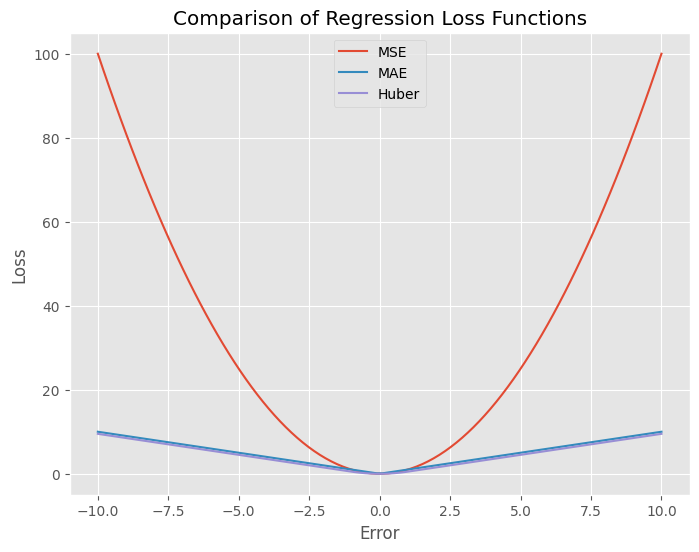

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y_true = np.zeros(100)
errors = np.linspace(-10, 10, 100)
y_pred = y_true + errors

mse_loss = errors**2
mae_loss = np.abs(errors)
huber_loss_vals = np.where(
    np.abs(errors) <= 1,
    0.5 * errors**2,
    np.abs(errors) - 0.5
)

plt.figure(figsize=(8,6))
plt.plot(errors, mse_loss, label="MSE")
plt.plot(errors, mae_loss, label="MAE")
plt.plot(errors, huber_loss_vals, label="Huber")
plt.xlabel("Error")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparison of Regression Loss Functions")
plt.show()


#KNN Regression on Linnerud Dataset

In [17]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.datasets import load_linnerud


In [19]:
linnerud = load_linnerud()
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
df['Weight'] = linnerud.target[:, 0]  # Predicting Weight

print(df.head())


   Chins  Situps  Jumps  Weight
0    5.0   162.0   60.0   191.0
1    2.0   110.0   60.0   189.0
2   12.0   101.0  101.0   193.0
3   12.0   105.0   37.0   162.0
4   13.0   155.0   58.0   189.0


In [20]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
x_train = train.drop('Weight', axis=1)
y_train = train['Weight']

x_test = test.drop('Weight', axis=1)
y_test = test['Weight']

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [21]:
def knn_regression(k, x_train, y_train, x_test, y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)


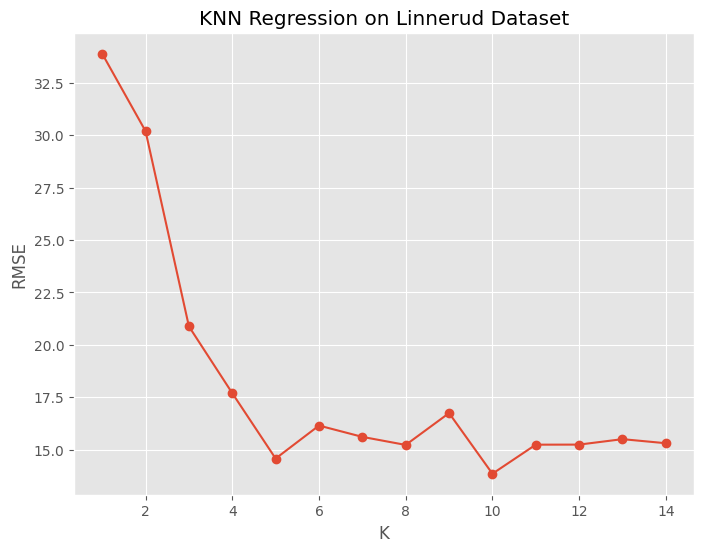

Minimum RMSE: 13.85514344927544
Best K: 10


In [22]:
rmse_val = []

for k in range(1, min(21, len(x_train) + 1)):
    knn_regression(k, x_train, y_train, x_test, y_test)

# RMSE vs K
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, min(21, len(x_train) + 1)), rmse_val, marker='o')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("KNN Regression on Linnerud Dataset")
plt.show()

rmse_val = np.asarray(rmse_val)

print("Minimum RMSE:", np.min(rmse_val))
print("Best K:", np.argmin(rmse_val) + 1)

From the RMSE vs K plot on the Linnerud dataset, it is clear that the model performs poorly for very small values of K. When K = 1 or 2, the RMSE is high, which indicates overfitting — the model is too sensitive to individual data points and captures noise instead of the underlying pattern.

As K increases, the RMSE drops sharply, showing that averaging over more neighbors improves generalization. The error reaches its minimum around K = 10, where the model achieves the best balance between bias and variance.

Beyond this point, the RMSE stabilizes and slightly fluctuates, which suggests underfitting begins to occur as the model becomes too smooth and predictions move closer to the mean of the training data. Thus, for the Linnerud dataset, a moderate K value (around 10) provides the most accurate predictions with the lowest RMSE.

#K is set to 1 or K is set to size of whole training dataset

In [23]:
k_1 = 1
model_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_1)
model_k1.fit(x_train, y_train)
pred_k1 = model_k1.predict(x_test)
rmse_k1 = sqrt(mean_squared_error(y_test, pred_k1))

print("RMSE when K = 1:", rmse_k1)

k_n = x_train.shape[0]
model_kn = neighbors.KNeighborsRegressor(n_neighbors=k_n)
model_kn.fit(x_train, y_train)
pred_kn = model_kn.predict(x_test)
rmse_kn = sqrt(mean_squared_error(y_test, pred_kn))

print("RMSE when K = size of training data (K = N):", rmse_kn)


RMSE when K = 1: 33.88706734630976
RMSE when K = size of training data (K = N): 15.309449751727865


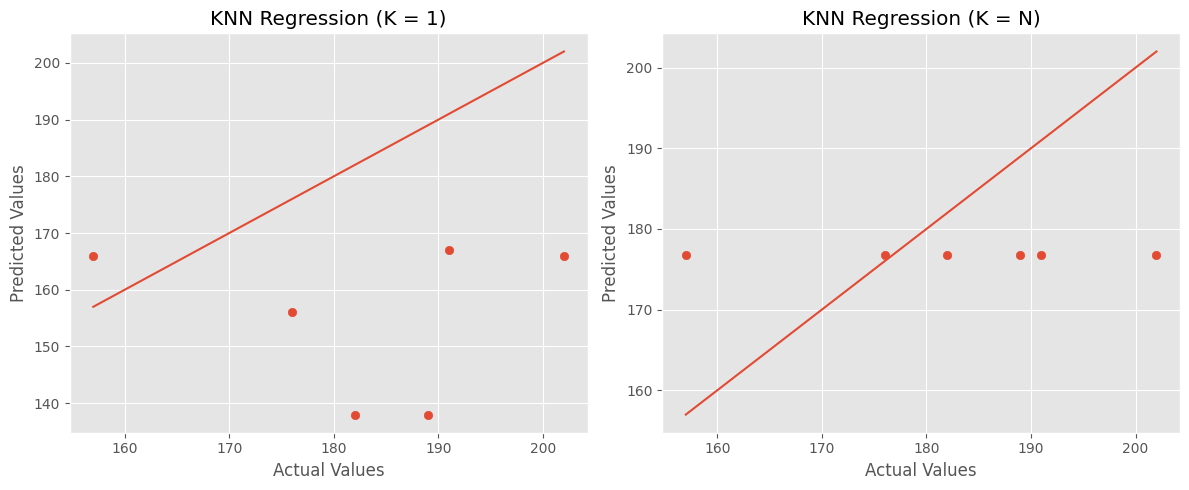

In [24]:
plt.figure(figsize=(12,5))

# K = 1 plot
plt.subplot(1,2,1)
plt.scatter(y_test, pred_k1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression (K = 1)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

# K = N plot
plt.subplot(1,2,2)
plt.scatter(y_test, pred_kn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression (K = N)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.tight_layout()
plt.show()

K = 1 plot:Points are widely scattered, showing unstable predictions and overfitting.

K = N plot:Points collapse around a horizontal line, indicating the model predicts nearly the same value for all inputs (underfitting).

When K is set to 1, the KNN regressor predicts the output using only the single nearest training point for each test sample. This makes the model extremely sensitive to noise and small variations in the data. As a result, predictions fluctuate a lot depending on individual points, leading to very low bias but very high variance. In practice, this causes overfitting—the model performs well on training data but poorly on unseen test data, which is why the RMSE is high when K = 1.

On the other hand, when K is set to the size of the entire training dataset, every prediction becomes the average of all training target values, regardless of the input features. The model completely ignores local patterns in the data and produces nearly the same prediction for all test points. This leads to very high bias and very low variance, resulting in underfitting. The RMSE increases again because the model is too simple to capture the relationship between features and the target.

Overall, these two extreme cases clearly demonstrate the bias–variance tradeoff in KNN regression:
K = 1 overfits the data, while K = N underfits it, and the best performance lies at an intermediate K where the model balances both.

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood